In [ ]:
Capstone_3 
Documentation - Model metrics ( see bottom)

In [ ]:
Disease Symptoms and Patient Profile Dataset- Health indicator model
 Reveals intricate relationship between patients and diseases over 100 diseases
Investigate the correlations between blood pressure, cholesterol levels, and the presence of
 symptoms.
 Understand how health indicators contribute to specific medical conditions

In [62]:
#load Data
import pandas as pd
import numpy as np

df= pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [63]:
df.describe()
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


(349, 10)

In [64]:
# Data  Cleaning
import pandas as pd

# Load the dataset again
data = df

# Data Cleaning and Wrangling

# Checking for missing values
missing_values = data.isnull().sum()

# Checking for duplicate entries
duplicate_rows = data.duplicated().sum()

# Converting categorical variables to numeric (encoding)
# For simplicity, using label encoding for binary categorical variables
data['Fever'] = data['Fever'].map({'Yes': 1, 'No': 0})
data['Cough'] = data['Cough'].map({'Yes': 1, 'No': 0})
data['Fatigue'] = data['Fatigue'].map({'Yes': 1, 'No': 0})
data['Difficulty Breathing'] = data['Difficulty Breathing'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Outcome Variable'] = data['Outcome Variable'].map({'Positive': 1, 'Negative': 0})

# For multi-category variables, using get_dummies (one-hot encoding)
bp_dummies = pd.get_dummies(data['Blood Pressure'], prefix='BP')
cholesterol_dummies = pd.get_dummies(data['Cholesterol Level'], prefix='Cholesterol')

# Concatenating the new columns to the original dataframe
data = pd.concat([data, bp_dummies, cholesterol_dummies], axis=1)

# Dropping the original columns for blood pressure and cholesterol level
data.drop(['Blood Pressure', 'Cholesterol Level'], axis=1, inplace=True)

# Summary of data cleaning and wrangling
cleaned_data_info = {
    "Initial Shape": data.shape,
    "Missing Values": missing_values,
    "Duplicate Rows": duplicate_rows,
    "Columns After Encoding": list(data.columns)
}

cleaned_data_info

{'Initial Shape': (349, 14),
 'Missing Values': Disease                 0
 Fever                   0
 Cough                   0
 Fatigue                 0
 Difficulty Breathing    0
 Age                     0
 Gender                  0
 Blood Pressure          0
 Cholesterol Level       0
 Outcome Variable        0
 dtype: int64,
 'Duplicate Rows': 49,
 'Columns After Encoding': ['Disease',
  'Fever',
  'Cough',
  'Fatigue',
  'Difficulty Breathing',
  'Age',
  'Gender',
  'Outcome Variable',
  'BP_High',
  'BP_Low',
  'BP_Normal',
  'Cholesterol_High',
  'Cholesterol_Low',
  'Cholesterol_Normal']}

In [65]:
data.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Outcome Variable,BP_High,BP_Low,BP_Normal,Cholesterol_High,Cholesterol_Low,Cholesterol_Normal
0,Influenza,1,0,1,1,19,0,1,False,True,False,False,False,True
1,Common Cold,0,1,1,0,25,0,0,False,False,True,False,False,True
2,Eczema,0,1,1,0,25,0,0,False,False,True,False,False,True
3,Asthma,1,1,0,1,25,1,1,False,False,True,False,False,True
4,Asthma,1,1,0,1,25,1,1,False,False,True,False,False,True
5,Eczema,1,0,0,0,25,0,1,False,False,True,False,False,True
6,Influenza,1,1,1,1,25,0,1,False,False,True,False,False,True
7,Influenza,1,1,1,1,25,0,1,False,False,True,False,False,True
8,Hyperthyroidism,0,1,0,0,28,0,0,False,False,True,False,False,True
9,Hyperthyroidism,0,1,0,0,28,0,0,False,False,True,False,False,True


<Figure size 1500x600 with 0 Axes>

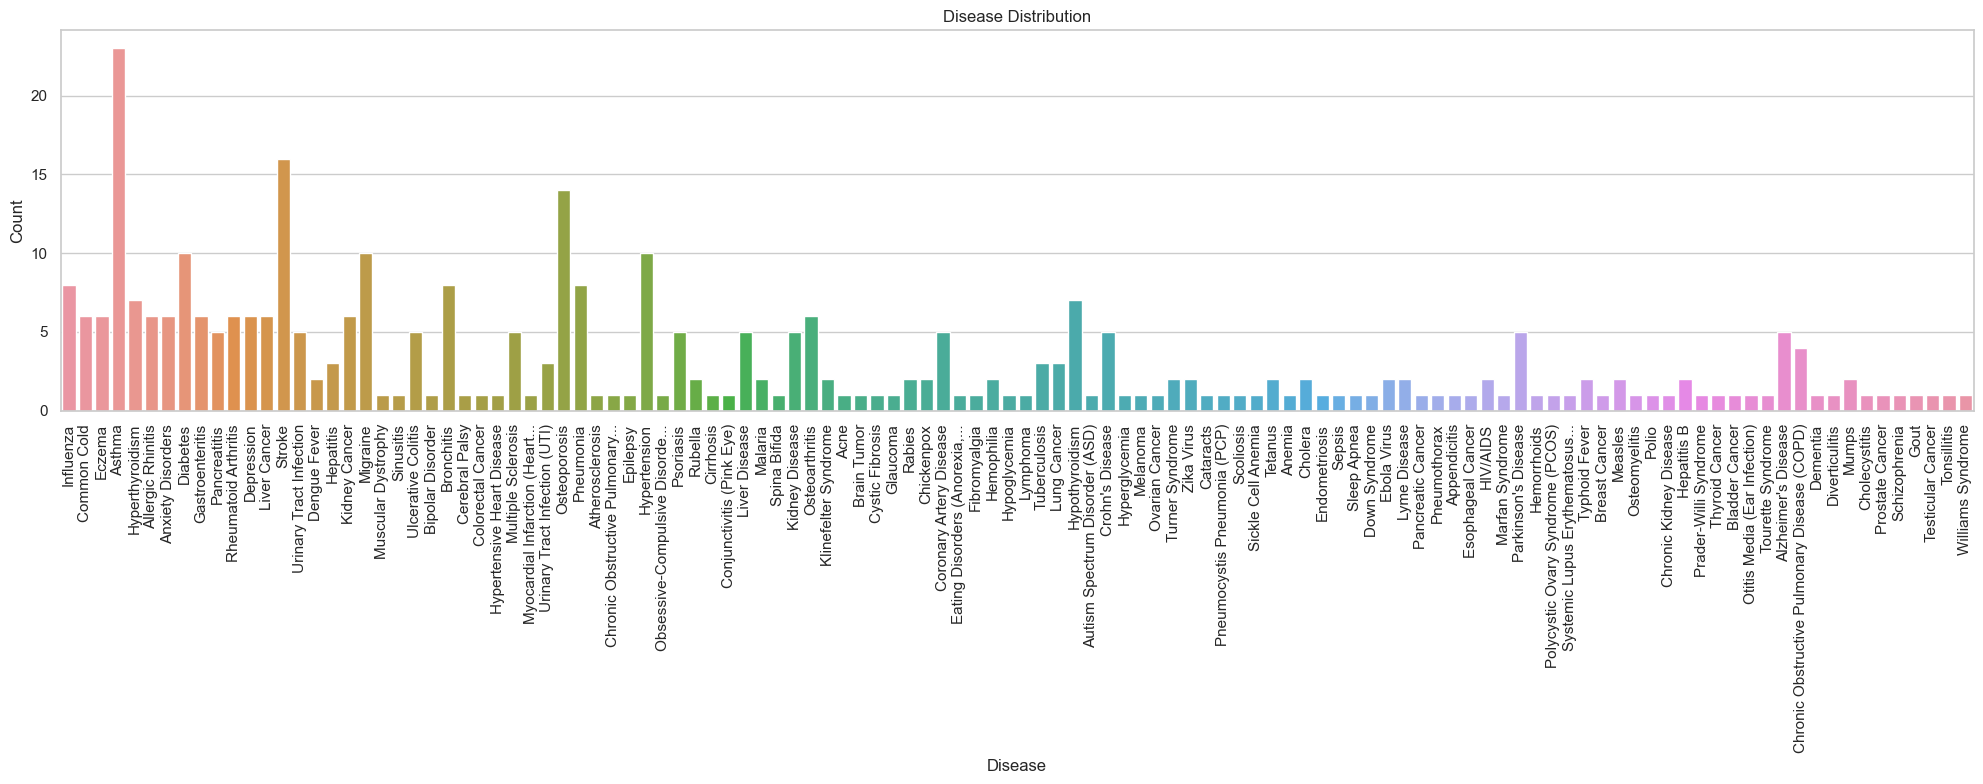

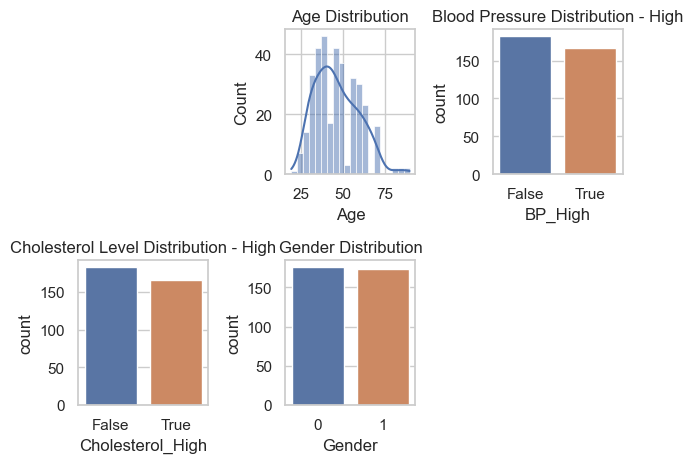

In [49]:
# Explantory Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

EDAdata = data

# Setting up the visualization style
sns.set(style="whitegrid")

# Summary Statistics
summary_statistics = EDAdata.describe()

# Disease Frequency Distribution
disease_counts = EDAdata['Disease'].value_counts()

# Age Distribution
age_distribution = EDAdata['Age'].describe()

# Blood Pressure Distributions
bp_high_counts = EDAdata['BP_High'].value_counts()
bp_low_counts = EDAdata['BP_Low'].value_counts()
bp_normal_counts = EDAdata['BP_Normal'].value_counts()

# Cholesterol Level Distributions
cholesterol_high_counts = EDAdata['Cholesterol_High'].value_counts()
cholesterol_low_counts = EDAdata['Cholesterol_Low'].value_counts()
cholesterol_normal_counts = EDAdata['Cholesterol_Normal'].value_counts()

# Gender Distribution
gender_counts = EDAdata['Gender'].value_counts()

# Visualizations
plt.figure(figsize=(15, 6))

# Disease Distribution
plt.figure(figsize=(20, 8))  # Increase figure size
sns.countplot(data=EDAdata, x='Disease')
plt.title('Disease Distribution')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.xlabel('Disease', fontsize=12)  # Optional: Increase font size
plt.ylabel('Count', fontsize=12)  # Optional: Increase font size
plt.tight_layout()
plt.show()

# Age Distribution
plt.subplot(2, 3, 2)
sns.histplot(data=EDAdata, x='Age', bins=20, kde=True)
plt.title('Age Distribution')

# Blood Pressure Distribution (example for BP_High)
plt.subplot(2, 3, 3)
sns.countplot(data=EDAdata, x='BP_High')
plt.title('Blood Pressure Distribution - High')

# Cholesterol Level Distribution (example for Cholesterol_High)
plt.subplot(2, 3, 4)
sns.countplot(data=EDAdata, x='Cholesterol_High')
plt.title('Cholesterol Level Distribution - High')

# Gender Distribution
plt.subplot(2, 3, 5)
sns.countplot(data=EDAdata, x='Gender')
plt.title('Gender Distribution')

plt.tight_layout()
plt.show()

In [ ]:
#Preprocessing

In [50]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(['Disease', 'Outcome Variable'], axis=1)
y = data['Outcome Variable'] 

# Encode boolean columns as integers
bool_cols = ['BP_High', 'BP_Low', 'BP_Normal', 'Cholesterol_High', 'Cholesterol_Low', 'Cholesterol_Normal']
X[bool_cols] = X[bool_cols].astype(int)

# Create a ColumnTransformer to scale numerical features
ct = ColumnTransformer(
    [('scale', StandardScaler(), ['Age'])],  # Scale 'Age'
    remainder='passthrough' 
)

# Apply the ColumnTransformer to the features
X = ct.fit_transform(X)

# Split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Model 1  - Logistic Regression to understand simple trends and baseline for the data set

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the Logistic Regression model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Train the model with the training data
log_reg.fit(X_train, y_train)

# Predict the outcomes for the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy of the logistic regression classifier on the test set: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy of the logistic regression classifier on the test set: 0.57
Confusion Matrix:
 [[16 14]
 [16 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.53      0.52        30
           1       0.63      0.60      0.62        40

    accuracy                           0.57        70
   macro avg       0.57      0.57      0.57        70
weighted avg       0.58      0.57      0.57        70



In [ ]:
# Model Evaluation

In [80]:
# Model 2: Random Forest ( ensamble method)
#preprocessing steps
#Lets create subcategories for disease and group accrodingly to help reduce dimensionality
disease_to_category_map = {
    'Influenza': 'Respiratory Diseases',
    'Common Cold': 'Respiratory Diseases',
    'Eczema': 'Skin Diseases',
    'Asthma': 'Respiratory Diseases',
    'Hyperthyroidism': 'Endocrine Disorders',
    'Allergic Rhinitis': 'Respiratory Diseases',
    'Anxiety Disorders': 'Mental Health Disorders',
    'Diabetes': 'Metabolic Disorders',
    'Gastroenteritis': 'Gastrointestinal Diseases',
    'Pancreatitis': 'Gastrointestinal Diseases',
    'Rheumatoid Arthritis': 'Autoimmune Diseases',
    'Depression': 'Mental Health Disorders',
    'Liver Cancer': 'Cancers',
    'Stroke': 'Cardiovascular Diseases',
    'Urinary Tract Infection': 'Urological Diseases',
    'Dengue Fever': 'Infectious Diseases',
    'Hepatitis': 'Infectious Diseases',
    'Kidney Cancer': 'Cancers',
    'Migraine': 'Neurological Disorders',
    'Muscular Dystrophy': 'Musculoskeletal Disorders',
    'Sinusitis': 'Respiratory Diseases',
    'Ulcerative Colitis': 'Gastrointestinal Diseases',
    'Bipolar Disorder': 'Mental Health Disorders',
    'Bronchitis': 'Respiratory Diseases',
    'Cerebral Palsy': 'Neurological Disorders',
    'Colorectal Cancer': 'Cancers',
    'Hypertensive Heart Disease': 'Cardiovascular Diseases',
    'Multiple Sclerosis': 'Neurological Disorders',
    'Myocardial Infarction (Heart Attack)': 'Cardiovascular Diseases',
    'Urinary Tract Infection (UTI)': 'Urological Diseases',
    'Osteoporosis': 'Musculoskeletal Disorders',
    'Pneumonia': 'Respiratory Diseases',
    'Atherosclerosis': 'Cardiovascular Diseases',
    'Chronic Obstructive Pulmonary Disease (COPD)': 'Respiratory Diseases',
    'Epilepsy': 'Neurological Disorders',
    'Hypertension': 'Cardiovascular Diseases',
    'Obsessive-Compulsive Disorder': 'Mental Health Disorders',
    'Psoriasis': 'Skin Diseases',
    'Rubella': 'Infectious Diseases',
    'Cirrhosis': 'Liver Diseases',
    'Conjunctivitis (Pink Eye)': 'Eye Diseases',
    'Liver Disease': 'Liver Diseases',
    'Malaria': 'Infectious Diseases',
    'Spina Bifida': 'Neurological Disorders',
    'Kidney Disease': 'Kidney Diseases',
    'Osteoarthritis': 'Musculoskeletal Disorders',
    'Klinefelter Syndrome': 'Genetic Disorders',
    'Acne': 'Skin Diseases',
    'Brain Tumor': 'Cancers',
    'Cystic Fibrosis': 'Respiratory Diseases',
    'Glaucoma': 'Eye Diseases',
    'Rabies': 'Infectious Diseases',
    'Chickenpox': 'Infectious Diseases',
    'Coronary Artery Disease': 'Cardiovascular Diseases',
    'Eating Disorders': 'Mental Health Disorders',
    'Fibromyalgia': 'Musculoskeletal Disorders',
    'Hemophilia': 'Blood Disorders',
    'Hypoglycemia': 'Metabolic Disorders',
    'Lymphoma': 'Cancers',
    'Tuberculosis': 'Infectious Diseases',
    'Lung Cancer': 'Cancers',
    'Hypothyroidism': 'Endocrine Disorders',
    'Autism Spectrum Disorder (ASD)': 'Neurological Disorders',
    "Crohn's Disease": 'Gastrointestinal Diseases',
    'Hyperglycemia': 'Metabolic Disorders',
    'Melanoma': 'Cancers',
    'Ovarian Cancer': 'Cancers',
    'Turner Syndrome': 'Genetic Disorders',
    'Zika Virus': 'Infectious Diseases',
    'Cataracts': 'Eye Diseases',
    'Pneumocystis Pneumonia (PCP)': 'Respiratory Diseases',
    'Scoliosis': 'Musculoskeletal Disorders',
    'Sickle Cell Anemia': 'Blood Disorders',
    'Tetanus': 'Infectious Diseases',
    'Anemia': 'Blood Disorders',
    'Cholera': 'Infectious Diseases',
    'Endometriosis': 'Reproductive Disorders',
    'Sepsis': 'Infectious',
     'Sepsis': 'Infectious Diseases',
    'Sleep Apnea': 'Respiratory Diseases',
    'Down Syndrome': 'Genetic Disorders',
    'Ebola Virus': 'Infectious Diseases',
    'Lyme Disease': 'Infectious Diseases',
    'Pancreatic Cancer': 'Cancers',
    'Pneumothorax': 'Respiratory Diseases',
    'Appendicitis': 'Gastrointestinal Diseases',
    'Esophageal Cancer': 'Cancers',
    'HIV/AIDS': 'Infectious Diseases',
    'Marfan Syndrome': 'Genetic Disorders',
    "Parkinson's Disease": 'Neurological Disorders',
    'Hemorrhoids': 'Gastrointestinal Diseases',
    'Polycystic Ovary Syndrome (PCOS)': 'Endocrine Disorders',
    'Systemic Lupus Erythematosus (SLE)': 'Autoimmune Diseases',
    'Typhoid Fever': 'Infectious Diseases',
    'Breast Cancer': 'Cancers',
    'Measles': 'Infectious Diseases',
    'Osteomyelitis': 'Infectious Diseases',
    'Polio': 'Infectious Diseases',
    'Chronic Kidney Disease': 'Kidney Diseases',
    'Hepatitis B': 'Infectious Diseases',
    'Prader-Willi Syndrome': 'Genetic Disorders',
    'Thyroid Cancer': 'Cancers',
    'Bladder Cancer': 'Cancers',
    'Otitis Media (Ear Infection)': 'Respiratory Diseases',
    'Tourette Syndrome': 'Neurological Disorders',
    "Alzheimer's Disease": 'Neurological Disorders',
    'Chronic Obstructive Pulmonary Disease (COPD)': 'Respiratory Diseases',
    'Dementia': 'Neurological Disorders',
    'Diverticulitis': 'Gastrointestinal Diseases',
    'Mumps': 'Infectious Diseases',
    'Cholecystitis': 'Gastrointestinal Diseases',
    'Prostate Cancer': 'Cancers',
    'Schizophrenia': 'Mental Health Disorders',
    'Gout': 'Musculoskeletal Disorders',
    'Testicular Cancer': 'Cancers',
    'Tonsillitis': 'Respiratory Diseases',
    'Williams Syndrome': 'Genetic Disorders'
}
data['Disease_Category'] = data['Disease'].map(disease_to_category_map)
# Check for uncategorized diseases and handle them
uncategorized = data['Disease_Category'].isna()
print(f"Uncategorized diseases: {data[uncategorized]['Disease'].unique()}")

# Drop uncategorized diseases
data = data[~uncategorized]

Uncategorized diseases: []


In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Function to categorize blood pressure
def categorize_blood_pressure(row):
    if row['BP_High']:
        return 'High'
    elif row['BP_Low']:
        return 'Low'
    else:
        return 'Normal'

# Function to categorize cholesterol
def categorize_cholesterol(row):
    if row['Cholesterol_High']:
        return 'High'
    elif row['Cholesterol_Low']:
        return 'Low'
    else:
        return 'Normal'

# Apply the categorization functions
data['Blood_Pressure_Status'] = data.apply(categorize_blood_pressure, axis=1)
data['Cholesterol_Status'] = data.apply(categorize_cholesterol, axis=1)

# Drop original boolean columns for blood pressure and cholesterol
data.drop(['BP_High', 'BP_Low', 'BP_Normal', 'Cholesterol_High', 'Cholesterol_Low', 'Cholesterol_Normal'], axis=1, inplace=True)

# Prepare the dataset for modeling
X = data.drop(['Disease', 'Disease_Category'], axis=1)  # Exclude both the original disease and the target variable
y = data['Disease_Category']  # Target variable for the model

# Encode categorical variables including the new blood pressure and cholesterol status features
X_encoded = pd.get_dummies(X)

# Split the encoded data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Instantiate and train the RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set and evaluate the model
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

Accuracy: 0.39
Confusion Matrix:
 [[ 1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  1  0  1  1  0  1  0  0  0  1  0  0  0  0]
 [ 0  1  3  0  0  1  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0]
 [ 0  2  0  1  0  0  0  1  0  0  0  0  2  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  7  0  0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  2  0  1  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  1  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  1  0  0  0  0  0  0  1  1  0  0  0 14  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0]]
Classification Report:
                        

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Jos

In [ ]:
#lets attempt a cross-validation given the performance of the Random forest model. We also looked at reducing dimentionality with grouping disease into caategories
#and created health indicator groupings for the binary features ( BH and Chlestoral)

In [86]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import numpy as np


# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Setup StratifiedKFold
strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_encoded, y, cv=strat_k_fold, scoring='accuracy')

# Print the average accuracy and standard deviation
print(f'CV Accuracy Scores: {cv_scores}')
print(f'Average CV Accuracy: {np.mean(cv_scores):.2f}')
print(f'Standard Deviation in CV Scores: {np.std(cv_scores):.2f}')

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


CV Accuracy Scores: [0.36231884 0.36231884 0.37681159 0.36231884 0.32352941]
Average CV Accuracy: 0.36
Standard Deviation in CV Scores: 0.02


In [ ]:
# This shows a consistency of prediction accross the dataset. Lets try  hyperparameter tuning

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=2)

# Assuming X_encoded and y are your features and target variable
grid_search.fit(X_encoded, y)

# Print the best parameters and the best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best CV score: {grid_search.best_score_:.2f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best CV score: 0.25


In [ ]:
# given the distibution of disease in the data set ( an imbalance). I will drop the underrepesented diseases from the data

In [88]:
# Count the occurrences of each disease
disease_counts = data['Disease'].value_counts()

# Filter out diseases that occur only once
diseases_to_keep = disease_counts[disease_counts > 1].index

# Filter the dataset to include only those diseases
data_filtered = data[data['Disease'].isin(diseases_to_keep)]

print(f"Original dataset size: {data.shape}")
print(f"Filtered dataset size: {data_filtered.shape}")

Original dataset size: (344, 11)
Filtered dataset size: (288, 11)


In [90]:
# Count the occurrences of each disease
disease_counts = data['Disease'].value_counts()

# Identify diseases that occur only once
singleton_diseases = disease_counts[disease_counts == 1].index
data_filtered = data[~data['Disease'].isin(singleton_diseases)]


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already preprocessed 'data_filtered' to create 'X' and 'y'
X = data_filtered.drop(['Disease'], axis=1)  # Assuming 'Disease' is not a feature in your model
y = data_filtered['Disease_Category']  # Or any other target variable you're using

# Encode categorical variables using pd.get_dummies() if not done already
X_encoded = pd.get_dummies(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

Accuracy: 1.00
Confusion Matrix:
 [[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 8 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 7 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 5 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 3 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 8 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 2]]
Classification Report:
                            precision    recall  f1-score   support

      Autoimmune Diseases       1.00      1.00      1.00         1
          Blood Disorders       1.00      1.00      1.00         1
                  Cancers       1.00      1.00      1.00         2
  Cardiovascular Diseases       1.00      1.00      1.00         8
      Endocrine Disorders       1.00      1.00      1.00         3
Gastrointestinal Diseases       1.00      1

In [92]:
# Removing the singleton classes and diseases with one incident improved the model. Lets check for overfitting
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_scores = cross_val_score(rf, X_encoded, y, cv=5, scoring='accuracy')

print(f"CV Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")
print(f"Standard Deviation in CV Scores: {cv_scores.std()}")

C:\Users\Joshua D\anaconda3\anaconda\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CV Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
Standard Deviation in CV Scores: 0.0


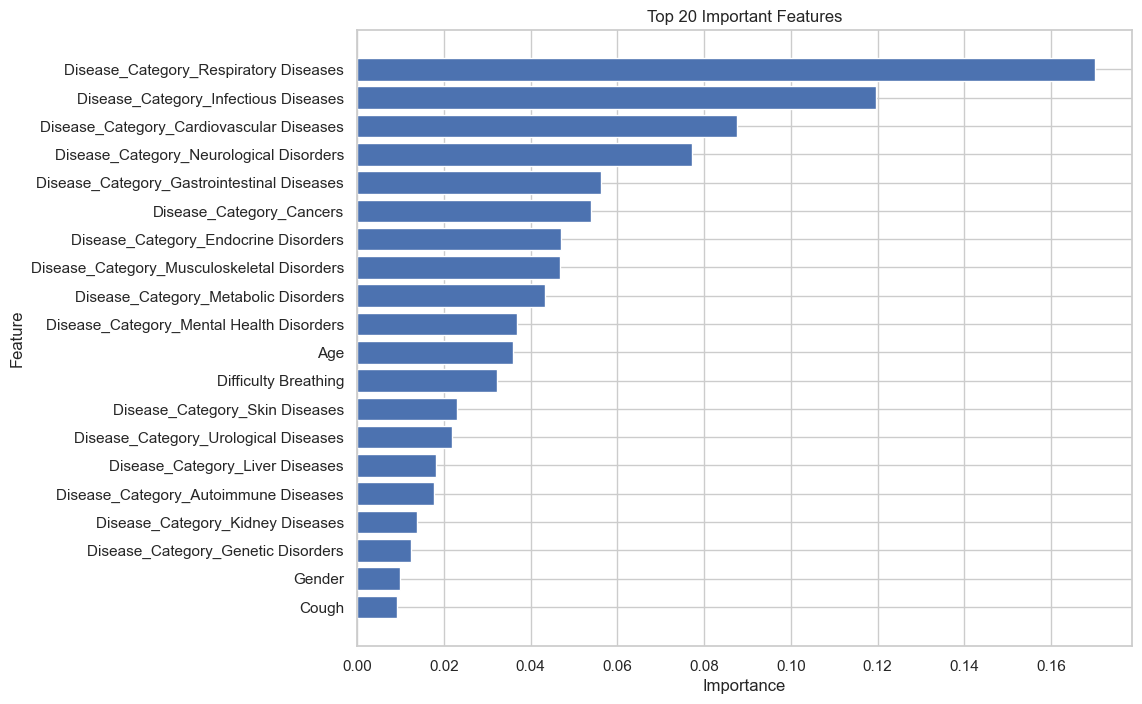

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_

# Convert the feature importances to a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 20 Important Features')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important at the top
plt.show()

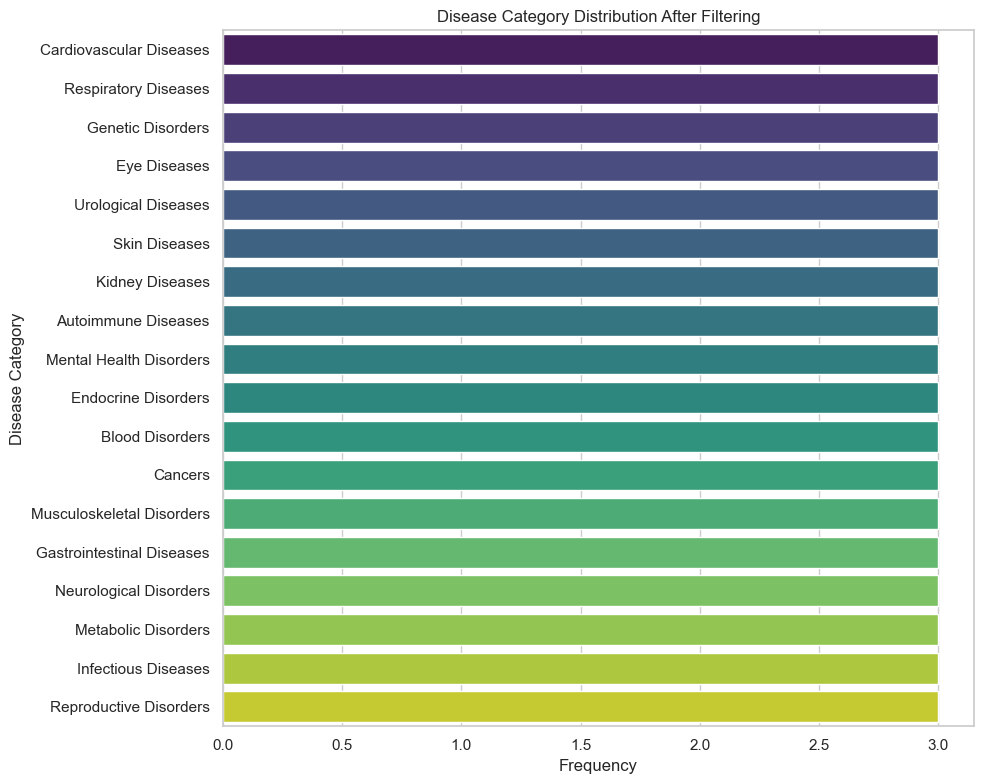

In [94]:
y = ['Cardiovascular Diseases', 'Respiratory Diseases', 'Infectious Diseases', 'Metabolic Disorders',
     'Neurological Disorders', 'Gastrointestinal Diseases', 'Musculoskeletal Disorders', 'Cancers',
     'Blood Disorders', 'Endocrine Disorders', 'Mental Health Disorders', 'Autoimmune Diseases',
     'Kidney Diseases', 'Skin Diseases', 'Urological Diseases', 'Eye Diseases', 'Genetic Disorders',
     'Reproductive Disorders'] * 3  # Sample data

# Create a DataFrame for visualization
df_for_visualization = pd.DataFrame({'Disease Category': y})

# Count the frequency of each category
category_counts = df_for_visualization['Disease Category'].value_counts()

# Plot
plt.figure(figsize=(10, 8))
sns.barplot(x=category_counts.values, y=category_counts.index, palette="viridis")
plt.title('Disease Category Distribution After Filtering')
plt.xlabel('Frequency')
plt.ylabel('Disease Category')
plt.tight_layout()
plt.show()

In [ ]:
# Given the 2 models we used a logisitical regression model and now a random forest model. I selected the random forest based on its results. There maybe a cause for overfitting due to the high CV score. 
# However, this is the better of the two mdoels tested. next steps might be implement a more complex model like XGBoost. 